In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import warnings
#warnings.filterwarnings("ignore")

In [8]:
data = pd.read_csv('./star_classification.csv')
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [10]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [11]:
print(data['class'].value_counts())

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64


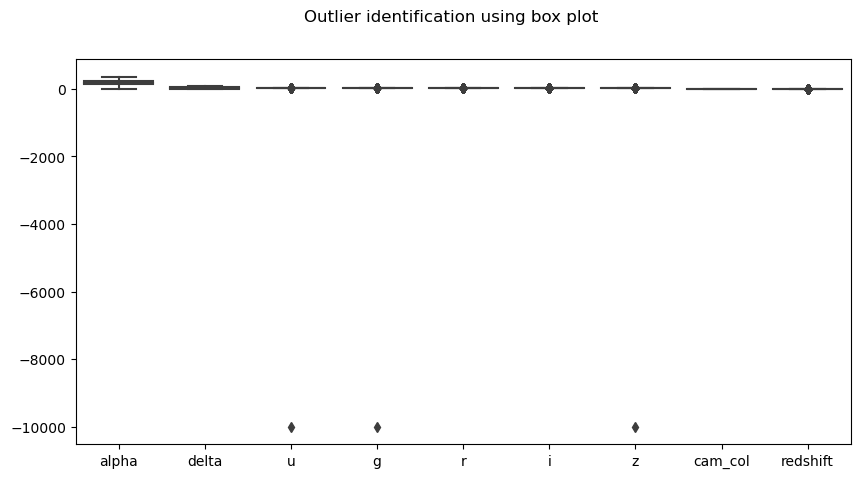

In [20]:
data['class'].replace(['GALAXY', 'STAR', 'QSO'], [0, 1, 2], inplace = True)

rel_columns = data.drop(['obj_ID', 'run_ID', 'rerun_ID', 'field_ID', 'spec_obj_ID', 'fiber_ID', 'MJD', 'plate'], axis = 1)

#Box Plots to identify outliers
fig = plt.figure(figsize = (10, 5))
fig.suptitle("Outlier identification using box plot")
ax = fig.add_subplot(111)
sns.boxplot(data = rel_columns.drop('class', axis = 1))
ax.set_xticklabels(rel_columns.drop('class', axis = 1).columns)
plt.show()

In [21]:
from collections import Counter

# Outlier detection using Tukey Method
def detect_outliers(df,n,features):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# List of Outliers
Outliers_to_drop = detect_outliers(rel_columns, 0, list(rel_columns))
rel_columns.loc[Outliers_to_drop]

,alpha,delta,u,g,r,i,z,cam_col,class,redshift
1046,0.115997,22.714164,29.19901,25.35543,23.48086,21.56495,17.17135,4,2,0.253981
4401,184.282050,7.624347,14.50678,12.67902,11.74664,11.29956,10.91847,4,0,0.007590
4472,239.423127,28.548438,12.26240,10.51139,10.06854,13.41786,10.22551,4,1,0.000025
6839,115.035475,49.271060,28.90174,19.24543,17.47902,16.80563,16.72323,5,0,0.787060
14227,84.217686,4.929016,14.64972,12.63574,12.14340,11.96598,13.13046,4,1,0.000290
...,...,...,...,...,...,...,...,...,...,...
99900,352.879980,27.433579,19.77479,19.29704,19.18981,19.16206,19.01953,5,2,2.551272
99926,148.560394,50.223285,22.08232,21.43803,21.41271,21.32197,20.83465,1,2,2.291461
99938,355.179454,27.714932,21.50280,21.59604,21.42026,21.01734,20.47349,5,2,1.794403
99949,34.602921,31.514091,22.45167,21.19384,20.60153,20.56568,20.14365,4,2,2.418509


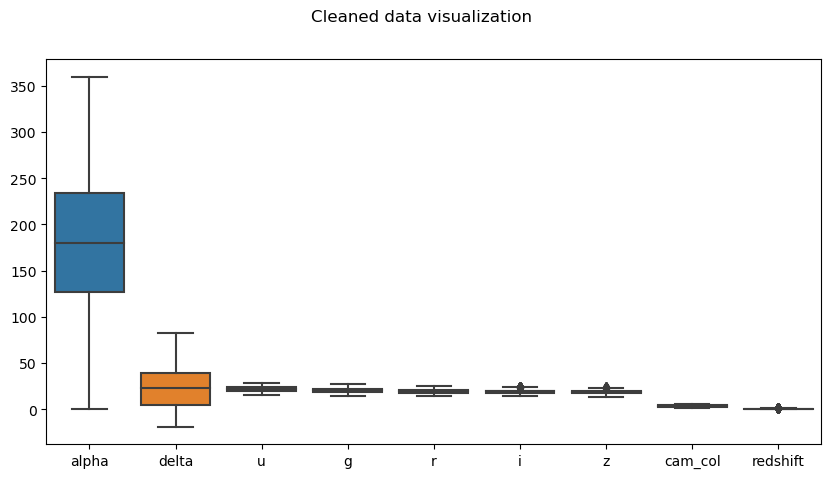

In [23]:
good_data = rel_columns.drop(data.index[Outliers_to_drop]).reset_index(drop = True)

#Box Plots after removing outliers
fig = plt.figure(figsize = (10, 5))
fig.suptitle("Cleaned data visualization")
ax = fig.add_subplot(111)
sns.boxplot(data = good_data.drop('class', axis = 1))
ax.set_xticklabels(good_data.drop('class', axis = 1).columns)
plt.show()

In [24]:
x = good_data.drop('class', axis = 1).to_numpy()
y = good_data['class'].to_numpy()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 100)

#Balancing classes using SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state = 100)
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

models = [("Logistic Regression", LogisticRegression(max_iter= 10000, random_state= 100)),
         ("Naive Bayes", GaussianNB()), ("Decision Tree", DecisionTreeClassifier()),
         ("k nearest neighbors", KNeighborsClassifier())]

In [25]:
#Class Balance - Train Data
print("Train Data - Class Split")
num_galaxy = (y_train_smt == 0).sum()
num_star = (y_train_smt == 1).sum()
num_qso = (y_train_smt == 2).sum()
print('Class Galaxy - ', num_galaxy)
print('Class Star - ', num_star)
print('Class Quasar - ', num_qso)

Train Data - Class Split
Class Galaxy -  47305
Class Star -  47305
Class Quasar -  47305


In [26]:
target_names = ['Galaxy', 'Star', 'Quasar']
print('Base Model Performance')
for name, method in models:
    method.fit(x_train_scaled, y_train)
    predict = method.predict(x_test_scaled)
    print("_________________________________________________________________________________________________")
    print("\nModel: ", name)
    print("\nConfusion Matrix")
    print(confusion_matrix(y_test, predict))
    print("\nClassification Report")
    print(classification_report(y_test, predict, target_names = target_names))

Base Model Performance
_________________________________________________________________________________________________

Model:  Logistic Regression

Confusion Matrix
[[11454   182   191]
 [    0  4301     2]
 [  459     2  1536]]

Classification Report
              precision    recall  f1-score   support

      Galaxy       0.96      0.97      0.96     11827
        Star       0.96      1.00      0.98      4303
      Quasar       0.89      0.77      0.82      1997

    accuracy                           0.95     18127
   macro avg       0.94      0.91      0.92     18127
weighted avg       0.95      0.95      0.95     18127

_________________________________________________________________________________________________

Model:  Naive Bayes

Confusion Matrix
[[10939   105   783]
 [   36  4267     0]
 [  440     0  1557]]

Classification Report
              precision    recall  f1-score   support

      Galaxy       0.96      0.92      0.94     11827
        Star       0.98      0.

In [60]:
# Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_lr = Pipeline([('scl', StandardScaler()), ('clf', LogisticRegression(multi_class= 'multinomial',
                                               solver= 'newton-cg',
                                               random_state= 100, max_iter= 10000))])
pipeline.insert(0,pipe_lr)

pipe_gnb= Pipeline([('scl', StandardScaler()), ('clf', GaussianNB())])
pipeline.insert(1,pipe_gnb)

pipe_dt= Pipeline([('scl', StandardScaler()), ('clf', DecisionTreeClassifier())])
pipeline.insert(2,pipe_dt)

pipe_knn= Pipeline([('scl', StandardScaler()), ('clf', KNeighborsClassifier())])
pipeline.insert(3,pipe_knn)

# Set grid search params 

modelpara =[]

param_gridlr = {'clf__penalty': ['l2'],
                'clf__solver':['newton-cg', 'sag', 'lbfgs']}
modelpara.insert(0,param_gridlr)

param_gridgnb = {}
modelpara.insert(1,param_gridgnb)

max_depth = range(1, 10)
param_griddt = {'clf__criterion':['gini','entropy'],
                'clf__max_depth':max_depth}
modelpara.insert(2,param_griddt)

param_gridknn = {'clf__n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                 'clf__algorithm' : ['auto','ball_tree','kd_tree','brute'],
                 'clf__weights' : ['uniform','distance']}
modelpara.insert(3,param_gridknn)

In [61]:
#Define Gridsearch Function
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    #cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params,scoring='recall_weighted')
    gs_clf = gs_clf.fit(x_train, y_train)
    model = gs_clf.best_estimator_
    
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
    print('\n')
    
    #Output Validation Statistics
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred,target_names=target_names))     
    print('\n____________________________________________________________________________________________________')

In [62]:
#Run Models

for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)


Optimized Model

Model Name: LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=100,
                   solver='newton-cg')



Best Parameters: {'clf__penalty': 'l2', 'clf__solver': 'sag'}

 [[11454   182   191]
 [    0  4301     2]
 [  459     2  1536]]

               precision    recall  f1-score   support

      Galaxy       0.96      0.97      0.96     11827
        Star       0.96      1.00      0.98      4303
      Quasar       0.89      0.77      0.82      1997

    accuracy                           0.95     18127
   macro avg       0.94      0.91      0.92     18127
weighted avg       0.95      0.95      0.95     18127


____________________________________________________________________________________________________

Optimized Model

Model Name: GaussianNB()



Best Parameters: {}

 [[10939   105   783]
 [   36  4267     0]
 [  440     0  1557]]

               precision    recall  f1-score   support

      Galaxy       0.96      0.92      0.94   